In [1]:
#download IMDB dataset
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews', with_info=True,as_supervised=True)

In [2]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='C:\\Users\\Ganesh\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num

In [3]:
class_names = info.features['label'].names
class_names

['neg', 'pos']

In [4]:
dataset

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'unsupervised': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [26]:
training_sentences = []
testing_sentences = []

training_labels = []
testing_labels = []

for text, label in dataset['train']:
    training_sentences.append(text.numpy().decode())
    training_labels.append(label.numpy())

for text, label in dataset['test']:
    testing_sentences.append(text.numpy().decode())
    testing_labels.append(label.numpy())

In [27]:
print(training_sentences[0])
print(training_labels[0])

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
0


In [28]:
#convert labels to int means list to numpy array
import numpy as np
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [29]:
#training_sentences[2:3]
training_sentences[:3]

["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development wa

# Data Preprocessing

In [30]:
from DataCleaning import clean_text

# Assuming training_sentences and testing_sentences are lists of strings

# Preprocess training sentences
training_sentences_clean = [clean_text(x) for x in training_sentences]

# Preprocess testing sentences
testing_sentences_clean = [clean_text(x) for x in testing_sentences]


D:\ML and DL Coading practce\Projects with Deployments\Streamlit Cloud\IMDB Review Predict Sentiment\DataCleaning.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [31]:
training_sentences_clean[:3]

['this was an absolutely terrible movie don t be lured in by christopher walken or michael ironside both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie s ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the columbian rebels were making their cases for revolutions maria conchita alonso appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor s like christopher walken s good name i could barely sit through it',
 'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the sette and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant consta

In [32]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(training_sentences_clean)
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'it': 7, 'in': 8, 'i': 9, 'this': 10, 'that': 11, 's': 12, 'was': 13, 'as': 14, 'for': 15, 'with': 16, 'movie': 17, 'but': 18, 'film': 19, 't': 20, 'you': 21, 'on': 22, 'not': 23, 'he': 24, 'are': 25, 'his': 26, 'have': 27, 'be': 28, 'one': 29, 'all': 30, 'at': 31, 'they': 32, 'by': 33, 'an': 34, 'who': 35, 'so': 36, 'from': 37, 'like': 38, 'there': 39, 'her': 40, 'or': 41, 'just': 42, 'about': 43, 'out': 44, 'if': 45, 'has': 46, 'what': 47, 'some': 48, 'good': 49, 'can': 50, 'more': 51, 'she': 52, 'when': 53, 'very': 54, 'up': 55, 'time': 56, 'no': 57, 'even': 58, 'my': 59, 'would': 60, 'which': 61, 'story': 62, 'only': 63, 'really': 64, 'see': 65, 'their': 66, 'had': 67, 'we': 68, 'were': 69, 'me': 70, 'well': 71, 'than': 72, 'much': 73, 'get': 74, 'bad': 75, 'been': 76, 'people': 77, 'will': 78, 'do': 79, 'other': 80, 'also': 81, 'into': 82, 'first': 83, 'great': 84, 'because': 85, 'how': 86, 'him': 87, 'don': 88, 'most': 89, '

In [33]:
training_sequences = tokenizer.texts_to_sequences(training_sentences_clean)

In [34]:
training_sequences[:3]

[[10,
  13,
  34,
  423,
  387,
  17,
  88,
  20,
  28,
  10394,
  8,
  33,
  1333,
  3214,
  41,
  465,
  10619,
  196,
  25,
  84,
  155,
  18,
  10,
  206,
  327,
  28,
  66,
  246,
  214,
  8,
  466,
  58,
  66,
  84,
  112,
  96,
  23,
  5612,
  10,
  17,
  12,
  632,
  753,
  10,
  17,
  6,
  34,
  391,
  7936,
  177,
  2422,
  411,
  1,
  89,
  1200,
  136,
  69,
  146,
  53,
  1,
  28750,
  7362,
  69,
  227,
  66,
  2908,
  15,
  18833,
  2742,
  19863,
  17934,
  1465,
  4865,
  2,
  40,
  3872,
  114,
  1558,
  16,
  3214,
  13,
  162,
  18,
  3,
  1200,
  900,
  7808,
  8,
  3,
  17,
  11,
  13,
  4103,
  4,
  99,
  145,
  1191,
  9,
  238,
  670,
  11,
  39,
  25,
  98,
  38,
  10,
  6971,
  269,
  12,
  38,
  1333,
  3214,
  12,
  49,
  392,
  9,
  96,
  1171,
  849,
  144,
  7],
 [9,
  27,
  76,
  558,
  5,
  788,
  2333,
  311,
  106,
  18,
  10,
  6,
  620,
  674,
  5,
  3,
  2194,
  4,
  181,
  576,
  64,
  1434,
  110,
  2228,
  2,
  3926,
  22,
  1,
  32267,
  2,
  

In [35]:
from keras.preprocessing.sequence import pad_sequences

max_len = max([len(x) for x in training_sequences])
training_padded = pad_sequences(training_sequences, maxlen=max_len, padding='pre')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences_clean)
testing_padded = pad_sequences(testing_sequences, maxlen=max_len, padding='pre')

In [36]:
print(training_padded[0])
print(training_padded.shape)
print(testing_padded[0])
print(testing_padded.shape)

[  0   0   0 ... 849 144   7]
(25000, 2487)
[  0   0   0 ...  56  46 213]
(25000, 2487)


In [37]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, Conv1D, GlobalMaxPooling1D


vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2487, 64)          4746048   
                                                                 
 conv1d_2 (Conv1D)           (None, 2485, 64)          12352     
                                                                 
 conv1d_3 (Conv1D)           (None, 2483, 128)         24704     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                      

In [38]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [41]:
history = model.fit(training_padded, training_labels, epochs=5, validation_data=(testing_padded, testing_labels))

Epoch 1/5


782/782 [==============================] - 103s 129ms/step - loss: 0.4782 - accuracy: 0.7538 - val_loss: 0.4508 - val_accuracy: 0.7942
Epoch 2/5
782/782 [==============================] - 105s 134ms/step - loss: 0.2935 - accuracy: 0.8775 - val_loss: 0.3029 - val_accuracy: 0.8749
Epoch 3/5
782/782 [==============================] - 108s 138ms/step - loss: 0.2225 - accuracy: 0.9149 - val_loss: 0.2610 - val_accuracy: 0.8935
Epoch 4/5
782/782 [==============================] - 107s 137ms/step - loss: 0.1608 - accuracy: 0.9405 - val_loss: 0.2670 - val_accuracy: 0.8944
Epoch 5/5
782/782 [==============================] - 107s 137ms/step - loss: 0.1103 - accuracy: 0.9628 - val_loss: 0.3065 - val_accuracy: 0.8927


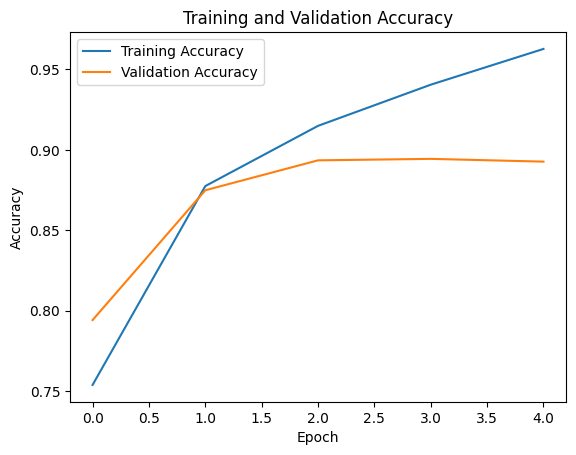

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


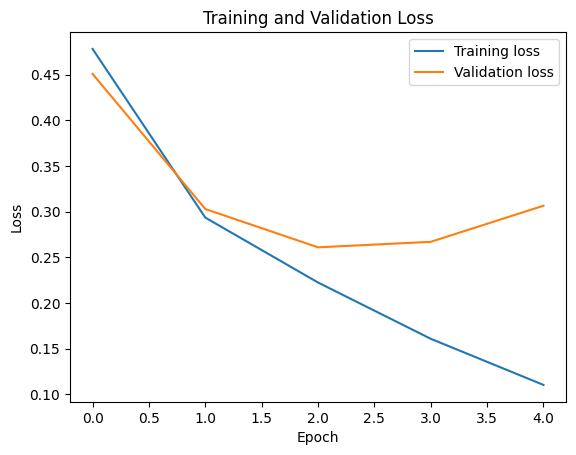

In [43]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [44]:
import pickle

filename = "IMDBTokenizer.pkl"
pickle.dump(tokenizer, open(filename, 'wb'))

In [45]:

model.save('IMDBSentimentAnalysisModel.h5')

D:\ML and DL Coading practce\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
#new_review = ['this movie is good for kids. @vrn doing acting in movies','this movie is not good for adults']
new_review = ["this movie is not good for adults"]
new_review = [clean_text(x) for x in new_review]
new_review = tokenizer.texts_to_sequences(new_review)
new_review = pad_sequences(new_review, maxlen=max_len)
prediction = model.predict(new_review)
print(prediction)

1/1 [==============================] - 0s 26ms/step
[[0.2597715]]


In [25]:
predicted_classes = [class_names[int(x)] for x in prediction > 0.5]
predicted_classes

C:\Users\Ganesh\AppData\Local\Temp\ipykernel_19192\2763293402.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_classes = [class_names[int(x)] for x in prediction > 0.5]


['pos']

In [46]:
# Save max_len to a file
filename = "max_len.pkl"
pickle.dump(max_len, open(filename, 'wb'))